In [1]:
import os
import numpy as np
from collections import defaultdict
import pandas as pd
import matplotlib.pyplot as plt
import json
%matplotlib inline

from tensorboard.backend.event_processing import event_accumulator
from collections import defaultdict


In [5]:
# list experiments
NUM_EXPERIMENTS = 2
root = "/mnt/storage/log-experiments/"
log_root = root + "logs/"

# only want last 15 experiments
# experiments = [f for f in os.listdir(log_root) if f[-4:] == 'json']

# place them in a dictionary
exp_dict = {}
for exp in os.listdir(log_root)[-NUM_EXPERIMENTS:]:
    if exp[-4:] == 'json':
        exp_id = exp[:-5]
        with open(log_root+exp, "rb") as f:
            exp_dict[exp_id] = json.load(f)
            
# convert dictionary to a dataframe
experiments_df = pd.DataFrame.from_dict(exp_dict, orient='index')

In [6]:
experiments_df.shape

(2, 27)

In [7]:
experiments_df.index

Index(['DQN_Malmo_Seq-MinecraftBasicNew-v0-20181014-223923-39', 'DQN_Malmo_Seq-MinecraftBasicNew-v0-20181015-030813-48'], dtype='object')

In [8]:
experiments_df.head()

,SEARCH_METHOD,DEFAULT_ENV_NAME,METHOD,NUM_TRIALS,DEBUG,MAX_GAMES_PLAYED,MEAN_REWARD_BOUND,NUMBER_EPISODES_MEAN,NUM_AGENTS,SHARING,...,GRAD_L2_CLIP,SYNC_TARGET_FRAMES,SOFT,SOFT_UPDATE_TAU,EPSILON_DECAY_LAST_FRAME,EPSILON_START,EPSILON_FINAL,INDEPENDENT_EVALUATION,PRINT_INTERVAL,DEVICE
DQN_Malmo_Seq-MinecraftBasicNew-v0-20181014-223923-39,hypothesis,MinecraftBasicNew-v0,DQN_Malmo_Seq,50,True,150,950,10,2,True,...,1,1000,True,0.005,2000,1.0,0.02,False,1,cuda
DQN_Malmo_Seq-MinecraftBasicNew-v0-20181015-030813-48,hypothesis,MinecraftBasicNew-v0,DQN_Malmo_Seq,50,True,150,950,10,2,False,...,1,1000,True,0.005,2000,1.0,0.02,False,1,cuda


In [44]:
runs_root = root + "runs/"
experiments_runs = os.listdir(runs_root)
experiments_runs

['DQN_Malmo-MinecraftBasic-v0-20181008-190941-15',
 'DQN_Malmo-MinecraftBasic-v0-20181008-191122-90',
 'DQN_Malmo-MinecraftBasic-v0-20181008-191144-77',
 'DQN_Malmo-MinecraftBasic-v0-20181008-191202-42',
 'DQN_Malmo-MinecraftBasic-v0-20181008-192912-83',
 'DQN_Malmo-MinecraftBasic-v0-20181008-192935-38',
 'DQN_Malmo-MinecraftBasic-v0-20181008-193016-02',
 'DQN_Malmo-MinecraftBasic-v0-20181008-193028-65',
 'DQN_Malmo-MinecraftBasic-v0-20181008-193211-39',
 'DQN_Malmo-MinecraftBasic-v0-20181008-194157-99',
 'DQN_Malmo-MinecraftBasic-v0-20181008-194339-03',
 'DQN_Malmo-MinecraftBasic-v0-20181008-211410-98',
 'DQN_Malmo-MinecraftBasic-v0-20181008-212057-90',
 'DQN_Malmo-MinecraftBasic-v0-20181008-212129-38',
 'DQN_Malmo-MinecraftBasic-v0-20181008-213653-62',
 'DQN_Malmo-MinecraftBasic-v0-20181008-213926-97',
 'DQN_Malmo-MinecraftBasic-v0-20181008-224711-66',
 'DQN_Malmo-MinecraftBasic-v0-20181009-120040-02',
 'DQN_Malmo-MinecraftBasic-v0-20181009-120448-58',
 'DQN_Malmo-MinecraftBasic-v0-2

In [45]:
runs_root = root + "runs/"
experiments_data = {}
for experiment in experiments_df.index:
    if experiment != ".DS_Store":
        for trial in os.listdir(os.path.join(runs_root, experiment)):
            if trial != ".DS_Store":
                for run in os.listdir(os.path.join(runs_root, experiment, trial)):
                    if trial != ".DS_Store":                
                        ea = event_accumulator.EventAccumulator(os.path.join(runs_root, experiment, trial, run))
                        ea.Reload()
                        eid = "-".join([experiment, trial])
                        experiments_data[eid] = None
                        for scalar in ea.Tags()['scalars']:
                            df_temp = pd.DataFrame(ea.Scalars(scalar)).drop('wall_time', axis=1).rename(index=str, columns={'value': scalar})
                            if experiments_data[eid] is None:
                                experiments_data[eid] = df_temp
                            else:
                                experiments_data[eid] = pd.merge(experiments_data[eid], df_temp, how='outer', on='step')
                                

In [46]:
# listing all experiments
experiments_data.keys()

dict_keys(['DQN_Malmo-MinecraftBasic-v0-20181009-140942-22-agent1-trial0', 'DQN_Malmo-MinecraftBasic-v0-20181009-140942-22-agent1-trial1', 'DQN_Malmo-MinecraftBasic-v0-20181009-140942-22-agent1-trial2', 'DQN_Malmo-MinecraftBasic-v0-20181009-144710-64-agent1-trial0', 'DQN_Malmo-MinecraftBasic-v0-20181009-144710-64-agent1-trial1', 'DQN_Malmo-MinecraftBasic-v0-20181009-144710-64-agent1-trial2', 'DQN_Malmo-MinecraftBasic-v0-20181009-151054-12-agent1-trial0', 'DQN_Malmo-MinecraftBasic-v0-20181009-151054-12-agent1-trial1', 'DQN_Malmo-MinecraftBasic-v0-20181009-151054-12-agent1-trial2', 'DQN_Malmo-MinecraftBasic-v0-20181009-154313-28-agent1-trial0', 'DQN_Malmo-MinecraftBasic-v0-20181009-154313-28-agent1-trial1', 'DQN_Malmo-MinecraftBasic-v0-20181009-154313-28-agent1-trial2', 'DQN_Malmo-MinecraftBasic-v0-20181009-161324-59-agent1-trial0', 'DQN_Malmo-MinecraftBasic-v0-20181009-161324-59-agent1-trial1', 'DQN_Malmo-MinecraftBasic-v0-20181009-161324-59-agent1-trial2', 'DQN_Malmo-MinecraftBasic-v0-

In [47]:
len(experiments_data.keys())

45

In [59]:
# getting columns from all experiments
sample = list(experiments_data.keys())[1]
experiments_data[sample].columns

Index(['step', 'speed', 'epsilon', 'step_reward', 'loss', 'q_value/min',
       'q_value/max', 'reward_100/avg', 'reward_100/std', 'reward', 'steps'],
      dtype='object')

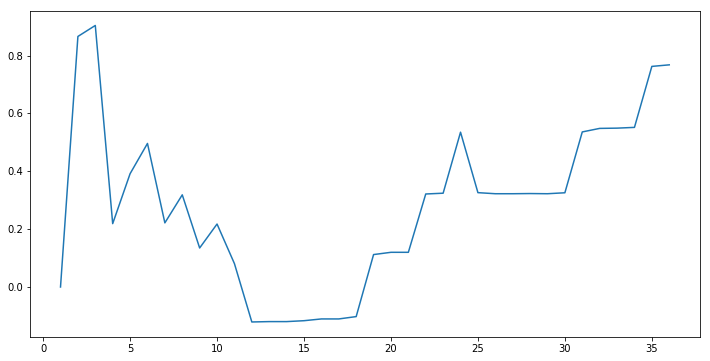

In [60]:
# example comparing rewards from within an experiment
plt.figure(figsize=(12,6))
exp_name = sample
for exp,data in experiments_data.items():
    if exp.startswith(exp_name):
        plt.plot(data['reward_100/avg'], label=exp_name)


In [64]:
experiments_data.keys()

dict_keys(['DQN_Malmo-MinecraftBasic-v0-20181009-140942-22-agent1-trial0', 'DQN_Malmo-MinecraftBasic-v0-20181009-140942-22-agent1-trial1', 'DQN_Malmo-MinecraftBasic-v0-20181009-140942-22-agent1-trial2', 'DQN_Malmo-MinecraftBasic-v0-20181009-144710-64-agent1-trial0', 'DQN_Malmo-MinecraftBasic-v0-20181009-144710-64-agent1-trial1', 'DQN_Malmo-MinecraftBasic-v0-20181009-144710-64-agent1-trial2', 'DQN_Malmo-MinecraftBasic-v0-20181009-151054-12-agent1-trial0', 'DQN_Malmo-MinecraftBasic-v0-20181009-151054-12-agent1-trial1', 'DQN_Malmo-MinecraftBasic-v0-20181009-151054-12-agent1-trial2', 'DQN_Malmo-MinecraftBasic-v0-20181009-154313-28-agent1-trial0', 'DQN_Malmo-MinecraftBasic-v0-20181009-154313-28-agent1-trial1', 'DQN_Malmo-MinecraftBasic-v0-20181009-154313-28-agent1-trial2', 'DQN_Malmo-MinecraftBasic-v0-20181009-161324-59-agent1-trial0', 'DQN_Malmo-MinecraftBasic-v0-20181009-161324-59-agent1-trial1', 'DQN_Malmo-MinecraftBasic-v0-20181009-161324-59-agent1-trial2', 'DQN_Malmo-MinecraftBasic-v0-

In [65]:
len('DQN_Malmo-MinecraftBasic-v0-20181009-140942-22')

46

In [71]:
# they don't all fit the same timeframe
rewards_exp = defaultdict(list)
for key in experiments_data.keys():
    exp_name = key[:46]
    num_episodes = len(experiments_data[key][['reward']].dropna())
    rewards_exp[exp_name].append(num_episodes)

experiment_results = list(zip(rewards_exp.keys(), map(lambda x:np.mean(x), rewards_exp.values())))

df_new = pd.DataFrame(experiment_results, columns=['exp', 'episodes'])
df_new = df_new.set_index('exp')
df_new

,episodes
exp,
DQN_Malmo-MinecraftBasic-v0-20181009-140942-22,37.000000
DQN_Malmo-MinecraftBasic-v0-20181009-144710-64,24.000000
DQN_Malmo-MinecraftBasic-v0-20181009-151054-12,31.333333
DQN_Malmo-MinecraftBasic-v0-20181009-154313-28,33.666667
DQN_Malmo-MinecraftBasic-v0-20181009-161324-59,27.666667
DQN_Malmo-MinecraftBasic-v0-20181009-164211-76,33.000000
DQN_Malmo-MinecraftBasic-v0-20181009-171924-23,38.000000
DQN_Malmo-MinecraftBasic-v0-20181009-175527-47,49.000000
DQN_Malmo-MinecraftBasic-v0-20181009-185842-63,49.000000


In [78]:
experiments_df.head()

,SEARCH_METHOD,DEFAULT_ENV_NAME,METHOD,NUM_TRIALS,DEBUG,MAX_GAMES_PLAYED,MEAN_REWARD_BOUND,NUMBER_EPISODES_MEAN,NUM_AGENTS,SHARING,...,GRAD_L2_CLIP,SYNC_TARGET_FRAMES,SOFT,SOFT_UPDATE_TAU,EPSILON_DECAY_LAST_FRAME,EPSILON_START,EPSILON_FINAL,INDEPENDENT_EVALUATION,PRINT_INTERVAL,DEVICE
DQN_Malmo-MinecraftBasic-v0-20181009-140942-22,hypothesis,MinecraftBasic-v0,DQN_Malmo,3,True,50,900,10,1,False,...,1,1000,True,0.005,2000,1.0,0.02,False,1,cuda
DQN_Malmo-MinecraftBasic-v0-20181009-144710-64,hypothesis,MinecraftBasic-v0,DQN_Malmo,3,True,50,900,10,1,False,...,1,1000,True,0.005,2000,1.0,0.02,False,1,cuda
DQN_Malmo-MinecraftBasic-v0-20181009-151054-12,hypothesis,MinecraftBasic-v0,DQN_Malmo,3,True,50,900,10,1,False,...,1,1000,True,0.005,2000,1.0,0.02,False,1,cuda
DQN_Malmo-MinecraftBasic-v0-20181009-154313-28,hypothesis,MinecraftBasic-v0,DQN_Malmo,3,True,50,900,10,1,False,...,1,1000,True,0.005,2000,1.0,0.02,False,1,cuda
DQN_Malmo-MinecraftBasic-v0-20181009-161324-59,hypothesis,MinecraftBasic-v0,DQN_Malmo,3,True,50,900,10,1,False,...,1,1000,True,0.005,2000,1.0,0.02,False,1,cuda


In [94]:
experiments_df_rev = pd.merge(experiments_df, df_new, left_index=True, right_index=True)

In [96]:
experiments_df_rev.sort_values(by='episodes', ascending=True)

,SEARCH_METHOD,DEFAULT_ENV_NAME,METHOD,NUM_TRIALS,DEBUG,MAX_GAMES_PLAYED,MEAN_REWARD_BOUND,NUMBER_EPISODES_MEAN,NUM_AGENTS,SHARING,...,SYNC_TARGET_FRAMES,SOFT,SOFT_UPDATE_TAU,EPSILON_DECAY_LAST_FRAME,EPSILON_START,EPSILON_FINAL,INDEPENDENT_EVALUATION,PRINT_INTERVAL,DEVICE,episodes
DQN_Malmo-MinecraftBasic-v0-20181009-144710-64,hypothesis,MinecraftBasic-v0,DQN_Malmo,3,True,50,900,10,1,False,...,1000,True,0.0050,2000,1.0,0.02,False,1,cuda,24.000000
DQN_Malmo-MinecraftBasic-v0-20181009-161324-59,hypothesis,MinecraftBasic-v0,DQN_Malmo,3,True,50,900,10,1,False,...,1000,True,0.0050,2000,1.0,0.02,False,1,cuda,27.666667
DQN_Malmo-MinecraftBasic-v0-20181009-151054-12,hypothesis,MinecraftBasic-v0,DQN_Malmo,3,True,50,900,10,1,False,...,1000,True,0.0050,2000,1.0,0.02,False,1,cuda,31.333333
DQN_Malmo-MinecraftBasic-v0-20181009-233508-16,hypothesis,MinecraftBasic-v0,DQN_Malmo,3,True,50,900,10,1,False,...,1000,True,0.0050,3000,1.0,0.02,False,1,cuda,32.000000
DQN_Malmo-MinecraftBasic-v0-20181009-164211-76,hypothesis,MinecraftBasic-v0,DQN_Malmo,3,True,50,900,10,1,False,...,1000,True,0.0050,2000,1.0,0.02,False,1,cuda,33.000000
DQN_Malmo-MinecraftBasic-v0-20181009-154313-28,hypothesis,MinecraftBasic-v0,DQN_Malmo,3,True,50,900,10,1,False,...,1000,True,0.0050,2000,1.0,0.02,False,1,cuda,33.666667
DQN_Malmo-MinecraftBasic-v0-20181009-225857-00,hypothesis,MinecraftBasic-v0,DQN_Malmo,3,True,50,900,10,1,False,...,1000,True,0.0050,1000,1.0,0.02,False,1,cuda,34.000000
DQN_Malmo-MinecraftBasic-v0-20181009-140942-22,hypothesis,MinecraftBasic-v0,DQN_Malmo,3,True,50,900,10,1,False,...,1000,True,0.0050,2000,1.0,0.02,False,1,cuda,37.000000
DQN_Malmo-MinecraftBasic-v0-20181009-171924-23,hypothesis,MinecraftBasic-v0,DQN_Malmo,3,True,50,900,10,1,False,...,1000,True,0.0050,2000,1.0,0.02,False,1,cuda,38.000000
DQN_Malmo-MinecraftBasic-v0-20181010-000755-03,hypothesis,MinecraftBasic-v0,DQN_Malmo,3,True,50,900,10,1,False,...,1000,True,0.0050,5000,1.0,0.02,False,1,cuda,40.000000


In [100]:
experiments_df_rev[['GAMMA', 'BATCH_SIZE', 'REPLAY_SIZE', 'LEARNING_RATE', 'SOFT_UPDATE_TAU', 'EPSILON_DECAY_LAST_FRAME', 'episodes']]

,GAMMA,BATCH_SIZE,REPLAY_SIZE,LEARNING_RATE,SOFT_UPDATE_TAU,EPSILON_DECAY_LAST_FRAME,episodes
DQN_Malmo-MinecraftBasic-v0-20181009-140942-22,0.99,32,10000,0.00010,0.0050,2000,37.000000
DQN_Malmo-MinecraftBasic-v0-20181009-144710-64,0.97,32,10000,0.00010,0.0050,2000,24.000000
DQN_Malmo-MinecraftBasic-v0-20181009-151054-12,1.00,32,10000,0.00010,0.0050,2000,31.333333
DQN_Malmo-MinecraftBasic-v0-20181009-154313-28,0.99,64,10000,0.00010,0.0050,2000,33.666667
DQN_Malmo-MinecraftBasic-v0-20181009-161324-59,0.99,128,10000,0.00010,0.0050,2000,27.666667
DQN_Malmo-MinecraftBasic-v0-20181009-164211-76,0.99,32,50000,0.00010,0.0050,2000,33.000000
DQN_Malmo-MinecraftBasic-v0-20181009-171924-23,0.99,32,100000,0.00010,0.0050,2000,38.000000
DQN_Malmo-MinecraftBasic-v0-20181009-175527-47,0.99,32,10000,0.00100,0.0050,2000,49.000000
DQN_Malmo-MinecraftBasic-v0-20181009-185842-63,0.99,32,10000,0.00500,0.0050,2000,49.000000
DQN_Malmo-MinecraftBasic-v0-20181009-200244-98,0.99,32,10000,0.00001,0.0050,2000,49.000000



- Gamma: Inconclusive. Reducing to 0.97, improves a lot, increasing to 1, increases something
- Batch Size: Increasing to 64 improves to 33, further increasing to 128 to improves to 27
- Replay Size: Inconclusive. Increasing to 50000 improves to 33, but increasing to 100000 moves to 38
- Learning Rate: All other learning rates increase number of episodes to 49 (the max). The average of all trials is 49. It is a werid results since I've tried both smaller and larger values, which suggest the current configuration is a "sweet spot"
- Soft Update Tau: same as above, both smaller and greater soft update tau give worst results. Seems also to suggest something else influencing results, specially since all results at the end seems to be more on the side of worst
- Epsilon Decay Last Frame: Inconclusive. With 2000 as default, reducing to 1000 improves results, as well as increasing to 3000, which gives the best result (32 compared to 37). Yet a too large epsilon decay last frame makes the problem worst.

Which factors I do in fact now?
- Reduce gamma to 0.97. Should I reduce the weight of the final goal? Try it
- Increase batch size to 128, seems to help a lot
- Replay Size increase to 20000, try increasing a little bit instead of a bunch, since it is inconclusive
- Learning Rate: keep the same
- Soft Update Tau: keep the same
- Epsilon Decay: keep the same (at 2000).. Less exploration will also favor my experience sharing approach.


Note: really need a better and more reliable benchmark - what if just screws up at benchmark? 3 trials for benchmark is just very littler

Results are very inconclusive. 3 trials are not enough. What I am seeing as a result is probably due to randomness. To get an accurate result I would need a lot more trials, at least in the benchmark position




In [113]:
# they don't all fit the same timeframe
steps_exp = defaultdict(list)
for key in experiments_data.keys():
    exp_name = key[:46]
    num_episodes = experiments_data[key][['steps']].dropna()
    steps_exp[exp_name].append(num_episodes.iloc[-1])



In [114]:
steps_exp 

defaultdict(list,
            {'DQN_Malmo-MinecraftBasic-v0-20181009-140942-22': [steps    14.0
              Name: 40, dtype: float64, steps    16.0
              Name: 36, dtype: float64, steps    22.0
              Name: 35, dtype: float64],
             'DQN_Malmo-MinecraftBasic-v0-20181009-144710-64': [steps    68.0
              Name: 28, dtype: float64, steps    29.0
              Name: 19, dtype: float64, steps    12.0
              Name: 25, dtype: float64],
             'DQN_Malmo-MinecraftBasic-v0-20181009-151054-12': [steps    5.0
              Name: 36, dtype: float64, steps    9.0
              Name: 39, dtype: float64, steps    21.0
              Name: 19, dtype: float64],
             'DQN_Malmo-MinecraftBasic-v0-20181009-154313-28': [steps    14.0
              Name: 48, dtype: float64, steps    13.0
              Name: 33, dtype: float64, steps    105.0
              Name: 20, dtype: float64],
             'DQN_Malmo-MinecraftBasic-v0-20181009-161324-59': [steps    37

In [ ]:
experiment_results = list(zip(rewards_exp.keys(), map(lambda x:np.mean(x), rewards_exp.values())))

df_new = pd.DataFrame(experiment_results, columns=['exp', 'episodes'])
df_new = df_new.set_index('exp')
df_new

In [123]:
16**4

65536